<a href="https://colab.research.google.com/github/pranjalsrivastava88/AggiesHackathon/blob/main/Data%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is written as a part of the Google Hackathon'22 at the Graduate School of Management, UC Davis.

Team Members:


1.   Harsh Harsh
2.   Mikhail Pyankov
3.   Pranjal Srivastava 
4.   Youfang Zhang



In [ ]:
### importing the libraries ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import missingno as mi
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.anova import anova_lm
import random
from statsmodels.formula.api import ols
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import statistics
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shapely
import seaborn as sns

from google.colab import drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### mounting googli drive ###

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
hiv_data = pd.read_csv('/content/gdrive/MyDrive/Terrible drive/Files/dohmh-hiv-aids-annual-report-1.csv')

In [ ]:
### looking at the first 6 columns ###

hiv_data.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0


In [ ]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              6005 non-null   int64  
 1   Borough                           6005 non-null   object 
 2   UHF                               6005 non-null   object 
 3   Gender                            6005 non-null   object 
 4   Age                               6005 non-null   object 
 5   Race                              6005 non-null   object 
 6   HIV diagnoses                     6005 non-null   int64  
 7   HIV diagnosis rate                6005 non-null   float64
 8   Concurrent diagnoses              6005 non-null   int64  
 9   % linked to care within 3 months  6005 non-null   int64  
 10  AIDS diagnoses                    6005 non-null   int64  
 11  AIDS diagnosis rate               6005 non-null   float64
 12  PLWDHI

In [ ]:
hiv_data.describe()

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000
mean,2013.000000,26.494588,119.501499,5.095087,25399.316403,33.299917,122.763697,317.515254,2655.912073,49.447460,10.341632,20003.185079,20005.061865
std,1.414331,130.995148,2883.974280,24.492574,43470.652710,1292.863435,3159.088051,5616.414102,15846.355601,1826.287128,16.379212,40001.239238,40000.301359
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.200000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,3.000000,18.500000,1.000000,83.000000,2.000000,10.400000,0.600000,79.000000,1.000000,6.000000,3.000000,5.500000
75%,2014.000000,13.000000,49.400000,3.000000,99999.000000,8.000000,30.600000,1.500000,87.000000,8.000000,14.100000,14.400000,22.100000
max,2015.000000,3379.000000,99999.000000,640.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,263.200000,99999.000000,99999.000000


In [ ]:
hiv_data.isnull().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

In [ ]:
### removing rows with 'All' to make it easier to group, lest the data will be 
### repeated ###

hiv_data = hiv_data[hiv_data['Borough'] != 'All']
hiv_data = hiv_data[hiv_data['Gender'] != 'All']
hiv_data = hiv_data[hiv_data['UHF'] != 'All']
hiv_data = hiv_data[hiv_data['Race'] != 'All']
hiv_data.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
59,2011,Bronx,Crotona - Tremont,Female,All,Asian/Pacific Islander,0,0.0,0,99999,0,0.0,0.5,71,0,0.0,0.0,0.0
60,2011,Bronx,Crotona - Tremont,Female,All,Black,16,60.7,6,75,26,98.7,2.9,66,23,20.7,11.2,9.5
61,2011,Bronx,Crotona - Tremont,Female,All,Latino/Hispanic,13,22.0,2,77,14,23.7,1.3,65,17,12.0,10.2,1.8
62,2011,Bronx,Crotona - Tremont,Female,All,Other/Unknown,0,0.0,0,99999,0,0.0,0.2,100,0,0.0,0.0,0.0
63,2011,Bronx,Crotona - Tremont,Female,All,White,2,127.4,0,50,0,0.0,2.3,54,1,28.7,0.0,28.7


In [ ]:
### trying to find unique values in Age ###

hiv_data['Age'].unique()

array(['All'], dtype=object)

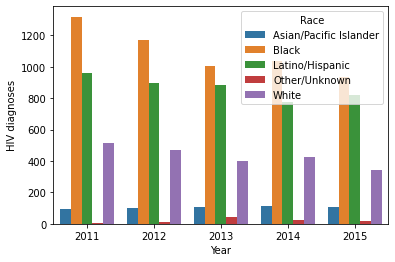

In [ ]:
### Plotting new HIV diagnoses every year split by Race ###

race_d = hiv_data.groupby(['Year', 'Race']).agg({'HIV diagnoses':'sum'}).reset_index()
sns.barplot( x = 'Year', y = 'HIV diagnoses', data = race_d, hue = 'Race')

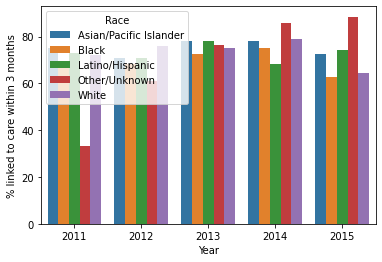

In [ ]:
### percentage of people who received healthcare ###

df = hiv_data[hiv_data['% linked to care within 3 months'] <= 100]

race_d = df.groupby(['Year', 'Race']).agg({'% linked to care within 3 months':'mean'}).reset_index()
race_d = race_d[race_d['% linked to care within 3 months'] <= 100]
sns.barplot( x = 'Year', y = '% linked to care within 3 months', data = race_d, hue = 'Race')

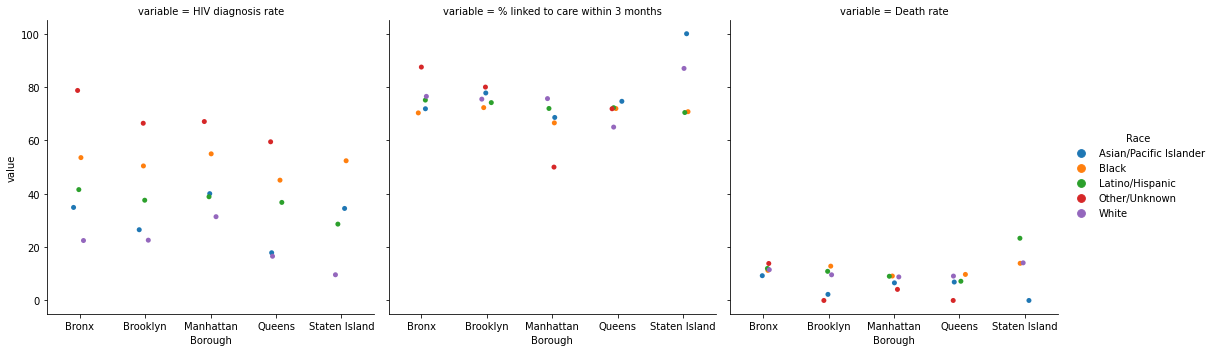

In [ ]:
### trying to see progression of patients from one stage to another ###

partial = hiv_data[hiv_data['HIV diagnosis rate'] <= 100]
partial = partial[partial['% linked to care within 3 months'] <= 100]
partial = partial[partial['% viral suppression'] <= 100]
partial = partial[partial['Death rate'] <= 100]
df = partial.groupby(['Race', 'Borough']).agg({'HIV diagnosis rate':'mean', '% linked to care within 3 months':'mean', '% viral suppression':'mean', 'Death rate':'mean'}).reset_index()

df = df.melt(id_vars=['Race', 'Borough'], value_vars=['HIV diagnosis rate', '% linked to care within 3 months', 'Death rate']).reset_index()

sns.catplot(data = df, x = "Borough", y = 'value', hue = "Race", col = "variable")


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


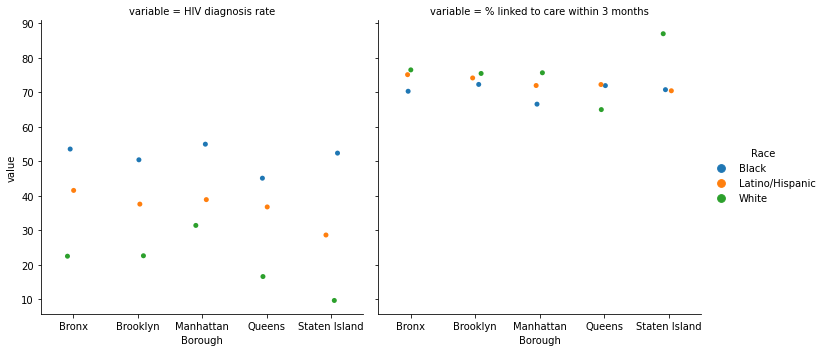

In [ ]:
partial = hiv_data[hiv_data['HIV diagnosis rate'] <= 100]
partial = partial[partial['% linked to care within 3 months'] <= 100]
partial = partial[partial['% viral suppression'] <= 100]
df = partial.groupby(['Race', 'Borough']).agg({'HIV diagnosis rate':'mean', '% linked to care within 3 months':'mean', '% viral suppression':'mean'}).reset_index()

df = df.melt(id_vars=['Race', 'Borough'], value_vars=['HIV diagnosis rate', '% linked to care within 3 months']).reset_index()

df = df[df['Race'] != "Other/Unknown"]
df = df[df['Race'] != 'Asian/Pacific Islander']

sns.catplot(data = df, x = "Borough", y = 'value', hue = "Race", col = "variable", size = 5.0)

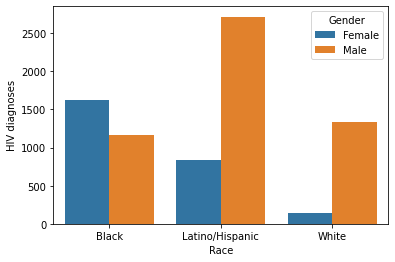

In [ ]:
partial = hiv_data[hiv_data['HIV diagnosis rate'] <= 100]
partial = partial[partial['% linked to care within 3 months'] <= 100]
partial = partial[partial['% viral suppression'] <= 100]
df = partial.groupby(['Gender', 'Race']).agg({'HIV diagnoses':'sum'}).reset_index()

##df = df.melt(id_vars=['Race', 'Borough'], value_vars=['HIV diagnosis rate', '% linked to care within 3 months']).reset_index()

df = df[df['Race'] != "Other/Unknown"]
df = df[df['Race'] != 'Asian/Pacific Islander']

sns.barplot(data = df, x = "Race", y = 'HIV diagnoses', hue = "Gender")
#ax.set_xticklabels(labels = ['Black', 'Latino/Hispanic', 'White'], rotation=10)

In [ ]:
df

,index,Race,Borough,variable,value
0,0,Asian/Pacific Islander,Bronx,HIV diagnosis rate,37.829412
1,1,Asian/Pacific Islander,Brooklyn,HIV diagnosis rate,26.519149
2,2,Asian/Pacific Islander,Manhattan,HIV diagnosis rate,40.048077
3,3,Asian/Pacific Islander,Queens,HIV diagnosis rate,17.615517
4,4,Asian/Pacific Islander,Staten Island,HIV diagnosis rate,34.500000
...,...,...,...,...,...
67,67,White,Bronx,% viral suppression,81.612903
68,68,White,Brooklyn,% viral suppression,84.323944
69,69,White,Manhattan,% viral suppression,86.357143
70,70,White,Queens,% viral suppression,82.924242


In [ ]:
####  Reading excel data ####

In [ ]:
df1 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2008.xlsx') 
df1.columns = df1.iloc[2]
df1 = df1.drop(index=[0, 1, 2], axis = 0)


df2 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2009.xlsx') 
df2.columns = df2.iloc[2]
df2 = df2.drop(index=[0, 1, 2], axis = 0)


df3 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2010.xlsx') 
df3.columns = df3.iloc[2]
df3 = df3.drop(index=[0, 1, 2], axis = 0)


df4 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2011.xlsx') 
df4.columns = df4.iloc[2]
df4 = df4.drop(index=[0, 1, 2], axis = 0)


df5 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2012.xlsx') 
df5.columns = df5.iloc[2]
df5 = df5.drop(index=[0, 1, 2], axis = 0)



df6 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2013.xlsx') 
df6.columns = df6.iloc[2]
df6 = df6.drop(index=[0, 1, 2], axis = 0)



df7 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2014.xlsx') 
df7.columns = df7.iloc[2]
df7 = df7.drop(index=[0, 1, 2], axis = 0)


df8 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2015.xlsx') 
df8.columns = df8.iloc[2]
df8 = df8.drop(index=[0, 1, 2], axis = 0)


df9 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2016.xlsx') 
df9.columns = df9.iloc[2]
df9 = df9.drop(index=[0, 1, 2], axis = 0)


df10 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2017.xlsx') 
df10.columns = df10.iloc[2]
df10 = df10.drop(index=[0, 1, 2], axis = 0)


df11 = pd.read_excel('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2018.xlsx') 
df11.columns = df11.iloc[2]
df11 = df11.drop(index=[0, 1, 2], axis = 0)


df12 = pd.read_csv('/content/gdrive/MyDrive/Terrible drive/Excel_files/AIDSVu_State_NewDX_2019.csv')

In [ ]:
df1['year'] = 2008
df2['year'] = 2009
df3['year'] = 2010
df4['year'] = 2011
df5['year'] = 2012
df6['year'] = 2013
df7['year'] = 2014
df8['year'] = 2015
df9['year'] = 2016
df10['year'] = 2017
df11['year'] = 2018
df12['year'] = 2019
 
df_combined = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

In [ ]:
df_combined.head()

,GEO ID,State Abbreviation,State,New Diagnoses State Rate,New Diagnoses State Rate Stability,New Diagnoses State Cases,New Diagnoses Male Rate,New Diagnoses Male Rate Stability,New Diagnoses Male Cases,New Diagnoses Female Rate,New Diagnoses Female Rate Stability,New Diagnoses Female Cases,New Diagnoses Black Rate,New Diagnoses Black Rate Stability,New Diagnoses Black Cases,New Diagnoses White Rate,New Diagnoses White Rate Stability,New Diagnoses White Cases,New Diagnoses Hispanic Rate,New Diagnoses Hispanic Rate Stability,New Diagnoses Hispanic Cases,New Diagnoses Asian Rate,New Diagnoses Asian Rate Stability,New Diagnoses Asian Cases,New Diagnoses American Indian/Alaska Native Rate,New Diagnoses American Indian/Alaska Native Rate Stability,New Diagnoses American Indian/Alaska Native Cases,ndmultirate,ndmultiyn,ndmulticase,New Diagnoses Native Hawaiian/Other Pacific Islander Rate,New Diagnoses Native Hawaiian/Other Pacific Islander Rate Stability,New Diagnoses Native Hawaiian/Other Pacific Islander Cases,New Diagnoses Age 13-24 Rate,New Diagnoses Age 13-24 Rate Stability,New Diagnoses Age 13-24 Cases,New Diagnoses Age 25-34 Rate,New Diagnoses Age 25-34 Rate Stability,New Diagnoses Age 25-34 Cases,New Diagnoses Age 35-44 Rate,...,New Diagnoses MSM and Hispanic Cases,New Diagnoses MSM/IDU and Hispanic Percent,New Diagnoses MSM/IDU and Hispanic Cases,New Diagnoses Other Transmission Category and Hispanic Percent,New Diagnoses Other Transmission Category and Hispanic Cases,New Diagnoses Heterosexual Contact and Multiple Race Percent,New Diagnoses Heterosexual Contact and Multiple Race Cases,New Diagnoses IDU and Multiple Race Percent,New Diagnoses IDU and Multiple Race Cases,New Diagnoses MSM and Multiple Race Percent,New Diagnoses MSM and Multiple Race Cases,New Diagnoses MSM/IDU and Multiple Race Percent,New Diagnoses MSM/IDU and Multiple Race Cases,New Diagnoses Other Transmission Category and Multiple Race Percent,New Diagnoses Other Transmission Category and Multiple Race Cases,New Diagnoses Heterosexual Contact and Native Hawaiian/Other Pacific Islander Percent,New Diagnoses Heterosexual Contact and Native Hawaiian/Other Pacific Islander Cases,New Diagnoses IDU and Native Hawaiian/Other Pacific Islander Percent,New Diagnoses IDU and Native Hawaiian/Other Pacific Islander Cases,New Diagnoses MSM and Native Hawaiian/Other Pacific Islander Percent,New Diagnoses MSM and Native Hawaiian/Other Pacific Islander Cases,New Diagnoses MSM/IDU and Native Hawaiian/Other Pacific Islander Percent,New Diagnoses MSM/IDU and Native Hawaiian/Other Pacific Islander Cases,New Diagnoses Other Transmission Category and Native Hawaiian/Other Pacific Islander Percent,New Diagnoses Other Transmission Category and Native Hawaiian/Other Pacific Islander Cases,New Diagnoses Heterosexual Contact and White Percent,New Diagnoses Heterosexual Contact and White Cases,New Diagnoses IDU and White Percent,New Diagnoses IDU and White Cases,New Diagnoses MSM and White Percent,New Diagnoses MSM and White Cases,New Diagnoses MSM/IDU and White Percent,New Diagnoses MSM/IDU and White Cases,New Diagnoses Other Transmission Category and White Percent,New Diagnoses Other Transmission Category and White Cases,New Diagnoses MSM Rate,year,New Diagnoses Multiple Race Rate,New Diagnoses Multiple Race Rate Stability,New Diagnoses Multiple Race Cases
0,1,AL,Alabama,18,Y,703,27,Y,491,11,Y,212,49,Y,479,5,Y,138,30,Y,28,3,N,1,5,N,1,185,Y,56,0,N,0,21,Y,168,29,Y,180,26,...,22,0,0,0,0,28.6,16,8.9,5,57.1,32,5.4,3,0,0,-1,0,-1,0,-1,0,-1,0,-1,0,20.3,28,10.1,14,61.6,85,7.2,10,0,0,-1,2008,NaN,NaN,NaN
1,2,AK,Alaska,7,Y,39,11,Y,31,3,N,8,34,N,7,5,Y,18,3,N,1,0,N,0,15,Y,12,5,N,1,0,N,0,4,N,5,11,N,11,11,...,0,0,0,0,0,0,0,100,1,0,0,0,0,0,0,-1,0,-1,0,-1,0,-1,0,-1,0,5.6,1,5.6,1,72.2,13,16.7,3,0,0,-1,2008,NaN,NaN,NaN
2,4,AZ,Arizona,13,Y,681,23,Y,597,3,Y,84,34,Y,62,10,Y,323,17,Y,243,9,N,11,13,Y,27,26,Y,15,0,N,0,11,Y,111,23,Y,214,23,...,156,5.3,13,0,0,20,3,13.3,2,60,9,6.7,1,0,0,-1,0,-1,0,-1,0,-1,0,-1,

In [ ]:
df_combined.to_csv('/content/gdrive/MyDrive/Terrible drive/Files/combined_data.csv')

In [ ]:
list(df_combined.columns)

['GEO ID',
 'State Abbreviation',
 'State',
 'New Diagnoses State Rate',
 'New Diagnoses State Rate Stability',
 'New Diagnoses State Cases',
 'New Diagnoses Male Rate',
 'New Diagnoses Male Rate Stability',
 'New Diagnoses Male Cases',
 'New Diagnoses Female Rate',
 'New Diagnoses Female Rate Stability',
 'New Diagnoses Female Cases',
 'New Diagnoses Black Rate',
 'New Diagnoses Black Rate Stability',
 'New Diagnoses Black Cases',
 'New Diagnoses White Rate',
 'New Diagnoses White Rate Stability',
 'New Diagnoses White Cases',
 'New Diagnoses Hispanic Rate',
 'New Diagnoses Hispanic Rate Stability',
 'New Diagnoses Hispanic Cases',
 'New Diagnoses Asian Rate',
 'New Diagnoses Asian Rate Stability',
 'New Diagnoses Asian Cases',
 'New Diagnoses American Indian/Alaska Native Rate',
 'New Diagnoses American Indian/Alaska Native Rate Stability',
 'New Diagnoses American Indian/Alaska Native Cases',
 'ndmultirate',
 'ndmultiyn',
 'ndmulticase',
 'New Diagnoses Native Hawaiian/Other Pacific

In [ ]:
partial = df_combined.groupby('year').agg({'New Diagnoses Black Cases':'sum', 'New Diagnoses White Cases':'sum', 'New Diagnoses Hispanic Cases':'sum'}).reset_index()

In [ ]:
partial['New Diagnoses Black Cases'].sum()

208494

In [ ]:
partial['New Diagnoses White Cases'].sum()

124933

In [ ]:
partial['New Diagnoses Hispanic Cases'].sum()

128387

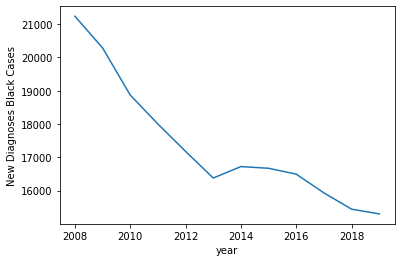

In [ ]:
sns.lineplot(data = partial, x = 'year', y = 'New Diagnoses Black Cases')

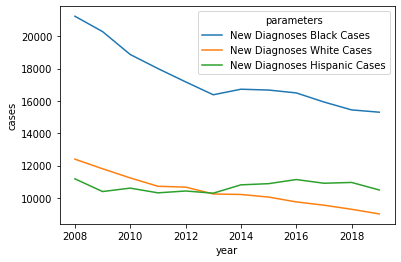

In [ ]:
partial = partial.melt(id_vars=['year'], value_vars=['New Diagnoses Black Cases', 'New Diagnoses White Cases', 'New Diagnoses Hispanic Cases'])
partial = partial.rename(columns= {'variable':'parameters', 'value':'cases'})

sns.lineplot(data = partial, x = 'year', y = 'cases', hue = 'parameters')

In [ ]:
#### funding issues ####

Federal research funding has been stagnant for the last decade. Need more money to come up with better HIV management. 
We need to move away from Philanthropic. 

,New Diagnoses Black Cases,New Diagnoses White Cases,New Diagnoses Hispanic Cases
year,,,
2008,21234,12396,11179
2009,20283,11802,10393
2010,18867,11235,10605
2011,17999,10719,10313
2012,17176,10666,10427


In [ ]:
year_state = df_combined.groupby(['year', 'State']).agg({'New Diagnoses Black Cases':'sum', 'New Diagnoses White Cases':'sum', 'New Diagnoses Hispanic Cases':'sum'}).reset_index()
df_combined.to_csv('/content/gdrive/MyDrive/Terrible drive/Files/year_state.csv')


In [ ]:
### Household Income ###

In [ ]:
d1 = pd.read_csv('/content/gdrive/MyDrive/Terrible drive/nhgis0002_csv/nhgis0002_ts_nominal_county.csv', encoding="ISO-8859-1", header=None)

In [ ]:
d1.columns = d1.iloc[0]
d1 = d1.drop(index=[0], axis = 0)

In [ ]:
d1.head()

,index,GISJOIN,STATE,STATEFP,STATENH,COUNTY,COUNTYFP,COUNTYNH,B70AA1980,B70AA1990,B70AA2000,B70AA125,B70AA125M,B70AB1980,B70AB1990,B70AB2000,B70AB125,B70AB125M,B70AC1980,B70AC1990,B70AC2000,B70AC125,B70AC125M,B70AD1980,B70AD1990,B70AD2000,B70AD125,B70AD125M,B70AE1980,B70AE1990,B70AE2000,B70AE125,B70AE125M,B70AF1980,B70AF1990,B70AF2000,B70AF125,B70AF125M,B70AG1980,B70AG1990,B70AG2000,B70AG125,B70AG125M,B70AH1980,B70AH1990,B70AH2000,B70AH125,B70AH125M,B70AI1980,B70AI1990,B70AI2000,B70AI125,B70AI125M,B70AJ1980,B70AJ1990,B70AJ2000,B70AJ125,B70AJ125M
0,1,G0100010,Alabama,01,010,Autauga County,001,0010,3095,2026,1635,1234,227,1507,1201,945,973,246,1628,1161,929,834,204,1322,977,1074,885,228,1109,860,876,1259,221,691,973,1014,1102,270,374,882,1079,1033,200,287,1347,1855,1717,262,142,1833,3663,3979,413,66,566,2902,6918,551
1,2,G0100030,Alabama,01,010,Baldwin County,003,0030,9143,6275,4874,4621,519,4507,3995,3834,3346,463,3888,3924,3480,3970,524,3126,3853,3846,4472,491,2257,3319,3793,4615,585,1441,2750,3795,3480,419,854,2471,3862,4083,488,803,3827,6493,7340,697,473,4521,10908,13657,817,196,2191,10471,23167,1173
2,3,G0100050,Alabama,01,010,Barbour County,005,0050,4145,2670,2425,1480,229,1410,1127,1109,1102,181,965,895,803,752,160,677,909,862,630,127,435,756,728,517,122,245,699,603,467,131,116,504,523,536,157,182,633,966,846,168,75,695,1312,1573,192,76,346,1101,1520,207
3,4,G0100070,Alabama,01,010,Bibb County,007,0070,2132,1485,1157,732,190,905,739,698,551,169,766,695,552,784,220,578,595,636,502,186,336,439,461,394,126,175,417,515,595,173,124,365,496,305,152,69,452,858,767,216,35,462,1201,1263,255,25,127,809,1493,260
4,5,G0100090,Alabama,01,010,Blount County,009,0090,4980,3149,2377,1627,295,2354,1705,1423,1291,224,1842,1665,1328,1255,218,1391,1472,1291,1404,235,935,1382,1527,1209,250,491,1269,1558,1419,274,312,912,1222,1102,225,227,1276,2184,2153,330,140,1327,3806,4357,417,22,459,2437,5214,465


In [ ]:
d1.drop(index=[0], axis = 0)

,GISJOIN,STATE,STATEFP,STATENH,COUNTY,COUNTYFP,COUNTYNH,B70AA1980,B70AA1990,B70AA2000,B70AA125,B70AA125M,B70AB1980,B70AB1990,B70AB2000,B70AB125,B70AB125M,B70AC1980,B70AC1990,B70AC2000,B70AC125,B70AC125M,B70AD1980,B70AD1990,B70AD2000,B70AD125,B70AD125M,B70AE1980,B70AE1990,B70AE2000,B70AE125,B70AE125M,B70AF1980,B70AF1990,B70AF2000,B70AF125,B70AF125M,B70AG1980,B70AG1990,B70AG2000,B70AG125,B70AG125M,B70AH1980,B70AH1990,B70AH2000,B70AH125,B70AH125M,B70AI1980,B70AI1990,B70AI2000,B70AI125,B70AI125M,B70AJ1980,B70AJ1990,B70AJ2000,B70AJ125,B70AJ125M
2,G0100030,Alabama,01,010,Baldwin County,003,0030,9143,6275,4874,4621,519,4507,3995,3834,3346,463,3888,3924,3480,3970,524,3126,3853,3846,4472,491,2257,3319,3793,4615,585,1441,2750,3795,3480,419,854,2471,3862,4083,488,803,3827,6493,7340,697,473,4521,10908,13657,817,196,2191,10471,23167,1173
3,G0100050,Alabama,01,010,Barbour County,005,0050,4145,2670,2425,1480,229,1410,1127,1109,1102,181,965,895,803,752,160,677,909,862,630,127,435,756,728,517,122,245,699,603,467,131,116,504,523,536,157,182,633,966,846,168,75,695,1312,1573,192,76,346,1101,1520,207
4,G0100070,Alabama,01,010,Bibb County,007,0070,2132,1485,1157,732,190,905,739,698,551,169,766,695,552,784,220,578,595,636,502,186,336,439,461,394,126,175,417,515,595,173,124,365,496,305,152,69,452,858,767,216,35,462,1201,1263,255,25,127,809,1493,260
5,G0100090,Alabama,01,010,Blount County,009,0090,4980,3149,2377,1627,295,2354,1705,1423,1291,224,1842,1665,1328,1255,218,1391,1472,1291,1404,235,935,1382,1527,1209,250,491,1269,1558,1419,274,312,912,1222,1102,225,227,1276,2184,2153,330,140,1327,3806,4357,417,22,459,2437,5214,465
6,G0100110,Alabama,01,010,Bullock County,011,0110,1961,1402,1158,659,174,604,501,474,159,79,285,450,305,259,123,228,320,353,342,178,168,246,250,252,89,84,260,247,213,84,35,92,239,236,94,32,211,287,369,162,57,197,407,583,211,27,76,273,668,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,G7201450,Puerto Rico,72,720,Vega Baja Municipio,145,1450,NaN,NaN,NaN,5722,371,NaN,NaN,NaN,2308,282,NaN,NaN,NaN,1818,244,NaN,NaN,NaN,1486,241,NaN,NaN,NaN,1171,201,NaN,NaN,NaN,832,173,NaN,NaN,NaN,679,160,NaN,NaN,NaN,1034,213,NaN,NaN,NaN,1245,221,NaN,NaN,NaN,987,194
3228,G7201470,Puerto Rico,72,720,Vieques Municipio,147,1470,NaN,NaN,NaN,885,169,NaN,NaN,NaN,447,155,NaN,NaN,NaN,345,107,NaN,NaN,NaN,280,95,NaN,NaN,NaN,304,120,NaN,NaN,NaN,147,74,NaN,NaN,NaN,127,80,NaN,NaN,NaN,172,93,NaN,NaN,NaN,137,81,NaN,NaN,NaN,77,53
3229,G7201490,Puerto Rico,72,720,Villalba Municipio,149,1490,NaN,NaN,NaN,2615,251,NaN,NaN,NaN,1047,169,NaN,NaN,NaN,745,171,NaN,NaN,NaN,699,153,NaN,NaN,NaN,394,124,NaN,NaN,NaN,496,142,NaN,NaN,NaN,289,95,NaN,NaN,NaN,530,144,NaN,NaN,NaN,552,140,NaN,NaN,NaN,258,101
3230,G7201510,Puerto Rico,72,720,Yabucoa Municipio,151,1510,NaN,NaN,NaN,3485,288,NaN,NaN,NaN,1501,198,NaN,NaN,NaN,1403,202,NaN,NaN,NaN,993,180,NaN,NaN,NaN,925,188,NaN,NaN,NaN,764,143,NaN,NaN,NaN,662,162,NaN,NaN,NaN,830,176,NaN,NaN,NaN,850,187,NaN,NaN,NaN,237,94


In [ ]:
d1 = d1.reset_index()

In [ ]:
d1.iloc[:,1]

0       G0100010
1       G0100030
2       G0100050
3       G0100070
4       G0100090
          ...   
3226    G7201450
3227    G7201470
3228    G7201490
3229    G7201510
3230    G7201530
Name: GISJOIN, Length: 3231, dtype: object

In [ ]:
d1.iloc[:, [1, 2, 5, 11, 16, 21, 26]]

,GISJOIN,STATE,COUNTY,B70AA125,B70AB125,B70AC125,B70AD125
0,G0100010,Alabama,Autauga County,1234,973,834,885
1,G0100030,Alabama,Baldwin County,4621,3346,3970,4472
2,G0100050,Alabama,Barbour County,1480,1102,752,630
3,G0100070,Alabama,Bibb County,732,551,784,502
4,G0100090,Alabama,Blount County,1627,1291,1255,1404
...,...,...,...,...,...,...,...
3226,G7201450,Puerto Rico,Vega Baja Municipio,5722,2308,1818,1486
3227,G7201470,Puerto Rico,Vieques Municipio,885,447,345,280
3228,G7201490,Puerto Rico,Villalba Municipio,2615,1047,745,699
3229,G7201510,Puerto Rico,Yabucoa Municipio,3485,1501,1403,993
